**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC5053 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

### Equipo 32
*   NOMBRE: Misael Valentin Partida Bañales
*   MATRÍCULA: A01840415
---
*   NOMBRE: Cristian Juan Carlos Paz Conde
*   MATRÍCULA: A01840610
---
*   NOMBRE: Gabriela Anahí Parra Aguilar 
*   MATRÍCULA: A01753492
---
*   NOMBRE: Eduardo Miguel Paz Calvopiña
*   MATRÍCULA: A00886517
---

En esta actividad trabajarás con el archivo `computer_prices.csv`, basado en un conjunto de datos sobre características técnicas y especificaciones de computadoras portátiles y de escritorio, disponible en Kaggle.

Los datos fueron recopilados para analizar el rendimiento y el precio de los dispositivos, e incluyen información sobre hardware, almacenamiento, conectividad y otras especificaciones técnicas. Los indicadores incluidos son:

* `device_type`: Tipo de dispositivo (ej. laptop, desktop)
* `brand`: Marca del dispositivo
* `model`: Modelo del dispositivo
* `release_year`: Año de lanzamiento del dispositivo
* `os`: Sistema operativo instalado
* `form_factor`: Factor de forma o diseño del dispositivo (ej. laptop, ultrabook, desktop tower)
* `cpu_brand`: Marca del procesador
* `cpu_tier`: Nivel o gama del procesador, ordinal del 1 al 6 según desempeño
* `cpu_cores`: Número de núcleos del procesador
* `cpu_threads`: Número de hilos de ejecución del procesador
* `gpu_brand`: Marca de la tarjeta gráfica
* `gpu_model`: Modelo específico de la tarjeta gráfica
* `gpu_tier`: Nivel o gama de la GPU, ordinal del 1 al 6 según desempeño
* `vram_gb`: Memoria de video de la GPU en gigabytes
* `ram_gb`: Memoria RAM del dispositivo en gigabytes
* `storage_type`: Tipo de almacenamiento (ej. HDD, SSD)
* `storage_gb`: Capacidad de almacenamiento en gigabytes
* `storage_drive_count`: Número de unidades de almacenamiento instaladas
* `display_type`: Tipo de pantalla (ej. IPS, TN, OLED)
* `charger_watts`: Potencia del cargador (en watts) para laptops
* `psu_watts`: Potencia de la fuente de poder (en watts) para desktops
* `wifi`: Estándar de conectividad Wi-Fi (ej. Wi-Fi 5, 6, 6E, 7)
* `bluetooth`: Versión de Bluetooth
* `weight_kg`: Peso del dispositivo en kilogramos
* `warranty_months`: Meses de garantía del dispositivo
* `price`: Precio del dispositivo. Es la variable de salida o *target*, es decir, la que se pretende predecir más adelante al construir el modelo.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.

In [51]:
# Instalar las bibliotecas necesarias
!pip install category_encoders

In [52]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from scipy.stats import probplot
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders.binary import BinaryEncoder
import os

1. Descarga el archivo: `computer_prices.csv` y guarda, en un dataframe (`compu_df`), todos sus registros.
* Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas de texto?
* Determina la cantidad de valores únicos por columna.
* Elimina las variables:
  * `model`: Debido a su altísima cardinalidad, lo que dificulta su uso en análisis y modelado.
  * `cpu_model`: Además de su elevada cardinalidad, su información ya está representada de manera implícita en otras variables como: `cpu_tier`, `cpu_cores` y `cpu_threads`

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
DIR = "/content/drive/MyDrive/Colab Notebooks/Tec MNA/Ciencia y Analitica de Datos/Semana 6/"
os.chdir(DIR)

In [55]:
compu_df = pd.read_csv("computer_prices.csv")
# Imprimir el encabezado con sus 10 primeros registros.
compu_df.head(10)

,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,cpu_cores,...,storage_gb,storage_drive_count,display_type,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price
0,Desktop,Samsung,Samsung Forge XDI,2022,Windows,ATX,Intel,Intel i5-11129,3,12,...,1024,1,LED,0,750,Wi-Fi 6,5.1,11.00,36,1383.99
1,Laptop,Samsung,Samsung Pro KM8,2022,Windows,Mainstream,Intel,Intel i7-11114,4,12,...,512,1,OLED,120,0,Wi-Fi 6,5.3,2.03,12,2274.99
2,Desktop,Lenovo,Lenovo Strix BIE,2024,macOS,SFF,AMD,AMD Ryzen 5 5168,2,8,...,512,2,LED,0,850,Wi-Fi 6,5.0,7.00,24,1879.99
3,Desktop,Dell,Dell Cube AXR,2024,Windows,ATX,AMD,AMD Ryzen 5 7550,2,6,...,512,2,IPS,0,650,Wi-Fi 6,5.2,6.00,36,1331.99
4,Laptop,Gigabyte,Gigabyte Pro IX1,2024,Linux,Gaming,AMD,AMD Ryzen 7 6230,5,16,...,256,1,Mini-LED,90,0,Wi-Fi 6,5.2,1.50,12,2681.99
5,Desktop,MSI,MSI Think KSG,2025,Windows,ATX,Intel,Intel i7-10369,5,16,...,512,2,LED,0,1000,Wi-Fi 5,5.0,9.00,36,2751.99
6,Desktop,Apple,Apple Arena R5Q,2024,Windows,ATX,Apple,Apple M2,2,6,...,2048,2,VA,0,850,Wi-Fi 6,5.1,9.00,24,1609.99
7,Desktop,Apple,Apple Station EWP,2023,Windows,Micro-ATX,Apple,Apple M2 Pro,3,8,...,1024,1,LED,0,650,Wi-Fi 6,5.0,8.00,12,2139.99
8,Laptop,Dell,Dell Creator GIQ,2024,Windows,Mainstream,Intel,Intel i9-14473,6,26,...,1024,1,LED,240,0,Wi-Fi 5,5.0,1.17,48,2953.99
9,Laptop,Lenovo,Lenovo Blade MIZ,2025,Windows,Ultrabook,AMD,AMD Ryzen 3 4374,1,4,...,512,1,IPS,45,0,Wi-Fi 6,5.3,1.50,24,1653.99


In [56]:
compu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   device_type          100000 non-null  object 
 1   brand                100000 non-null  object 
 2   model                100000 non-null  object 
 3   release_year         100000 non-null  int64  
 4   os                   100000 non-null  object 
 5   form_factor          100000 non-null  object 
 6   cpu_brand            100000 non-null  object 
 7   cpu_model            100000 non-null  object 
 8   cpu_tier             100000 non-null  int64  
 9   cpu_cores            100000 non-null  int64  
 10  cpu_threads          100000 non-null  int64  
 11  gpu_brand            100000 non-null  object 
 12  gpu_model            100000 non-null  object 
 13  gpu_tier             100000 non-null  int64  
 14  vram_gb              100000 non-null  int64  
 15  ram_gb            

**Columnas Numericas**: 15

**Columnas de Texto**: 12

In [57]:
# Valores unicos por columna
compu_df.nunique().sort_values(ascending=False)

,0
model,99036
cpu_model,26971
price,3366
gpu_model,49
weight_kg,47
cpu_threads,25
ram_gb,15
cpu_cores,12
brand,10
form_factor,10


In [58]:
# Eliminar las columnas model y cpu_model

compu_df = compu_df.drop(columns=["model", "cpu_model"])

compu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   device_type          100000 non-null  object 
 1   brand                100000 non-null  object 
 2   release_year         100000 non-null  int64  
 3   os                   100000 non-null  object 
 4   form_factor          100000 non-null  object 
 5   cpu_brand            100000 non-null  object 
 6   cpu_tier             100000 non-null  int64  
 7   cpu_cores            100000 non-null  int64  
 8   cpu_threads          100000 non-null  int64  
 9   gpu_brand            100000 non-null  object 
 10  gpu_model            100000 non-null  object 
 11  gpu_tier             100000 non-null  int64  
 12  vram_gb              100000 non-null  int64  
 13  ram_gb               100000 non-null  int64  
 14  storage_type         100000 non-null  object 
 15  storage_gb        

2. Antes de iniciar con el análisis univariado, verifica si hay valores duplicados y/o faltantes.
* Obtén las estadísticas descriptivas, separado las numéricas y las categóricas. De estas últimas incluye las tablas de frecuencia.
* Genera histogramas para las numéricas y diagramas de barras para las categóricas. Con alta cardinalidad, sólo incluye los 10 valores más frecuentes.

In [59]:
# Cantidad de registros duplicados
compu_df.duplicated().sum()

np.int64(0)

In [60]:
# Cantidad de valores faltantes
compu_df.isnull().sum()

,0
device_type,0
brand,0
release_year,0
os,0
form_factor,0
cpu_brand,0
cpu_tier,0
cpu_cores,0
cpu_threads,0
gpu_brand,0


In [61]:
# Estadísticas descriptivas
# Variables numéricas
num_df = compu_df.select_dtypes(include=['int64', 'float64'])
num_df.describe()

,release_year,cpu_tier,cpu_cores,cpu_threads,gpu_tier,vram_gb,ram_gb,storage_gb,storage_drive_count,charger_watts,psu_watts,bluetooth,weight_kg,warranty_months,price
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,2022.320850,3.153490,10.515740,19.372700,2.991350,6.152180,39.706400,903.936000,1.524980,61.383450,272.520500,5.084764,4.289699,22.20036,1928.764220
std,2.025761,1.373175,5.044092,9.718426,1.459643,3.964926,31.902684,774.243654,0.797284,62.795034,354.686355,0.245977,3.814628,10.23190,580.492689
min,2018.000000,1.000000,4.000000,4.000000,1.000000,0.000000,8.000000,256.000000,1.000000,0.000000,0.000000,4.200000,0.920000,12.00000,372.990000
25%,2021.000000,2.000000,6.000000,12.000000,2.000000,4.000000,16.000000,512.000000,1.000000,0.000000,0.000000,5.000000,1.500000,12.00000,1503.990000
50%,2023.000000,3.000000,8.000000,16.000000,3.000000,6.000000,32.000000,512.000000,1.000000,65.000000,0.000000,5.100000,2.000000,24.00000,1863.990000
75%,2024.000000,4.000000,14.000000,24.000000,4.000000,8.000000,64.000000,1024.000000,2.000000,90.000000,650.000000,5.200000,7.000000,24.00000,2287.990000
max,2025.000000,6.000000,28.000000,56.000000,6.000000,16.000000,144.000000,4096.000000,4.000000,240.000000,1200.000000,5.300000,16.000000,48.00000,10984.990000


In [62]:
# Variables categóricas
cat_df = compu_df.select_dtypes(include=['object'])
cat_df.describe()

,device_type,brand,os,form_factor,cpu_brand,gpu_brand,gpu_model,storage_type,display_type,wifi
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,2,10,4,10,3,4,49,4,6,4
top,Laptop,Lenovo,Windows,Mainstream,Intel,NVIDIA,Apple Integrated,NVMe,LED,Wi-Fi 6
freq,59844,15992,71817,17819,52774,54712,18922,45059,32000,46149


In [63]:
# Tablas de frecuencia (categóricas)
for col in cat_df.columns:
    print(f"\nFrecuencia de {col}:")
    print(compu_df[col].value_counts())


Frecuencia de device_type:
device_type
Laptop     59844
Desktop    40156
Name: count, dtype: int64

Frecuencia de brand:
brand
Lenovo      15992
HP          14114
Dell        14005
Apple       11915
ASUS        10159
Acer         9925
Samsung      8066
MSI          7891
Gigabyte     4900
Razer        3033
Name: count, dtype: int64

Frecuencia de os:
os
Windows     71817
macOS       18207
Linux        6109
ChromeOS     3867
Name: count, dtype: int64

Frecuencia de form_factor:
form_factor
Mainstream     17819
Gaming         16876
ATX            15597
Ultrabook      13236
Micro-ATX       8672
Full-Tower      7110
2-in-1          7049
SFF             5585
Workstation     4864
Mini-ITX        3192
Name: count, dtype: int64

Frecuencia de cpu_brand:
cpu_brand
Intel    52774
AMD      35311
Apple    11915
Name: count, dtype: int64

Frecuencia de gpu_brand:
gpu_brand
NVIDIA    54712
Apple     18922
AMD       15767
Intel     10599
Name: count, dtype: int64

Frecuencia de gpu_model:
gpu_model
A

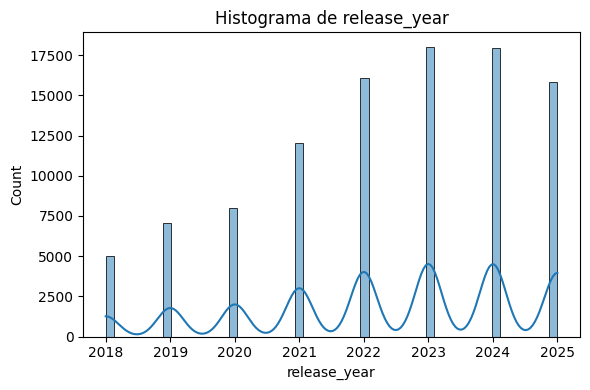

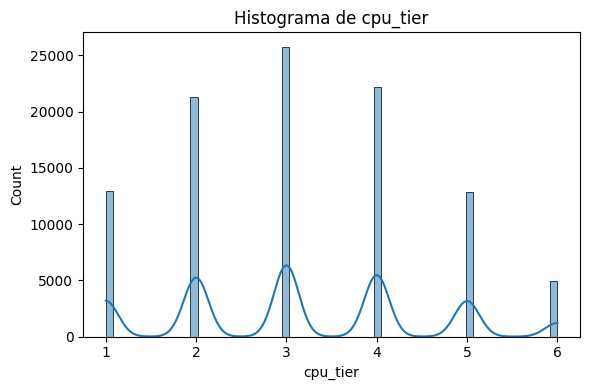

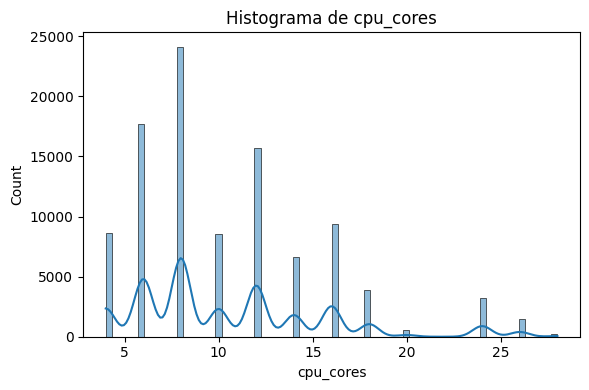

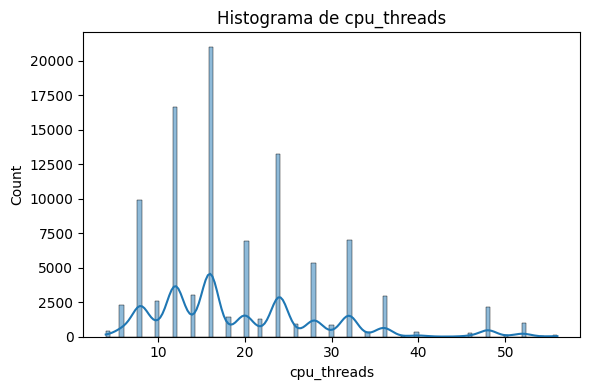

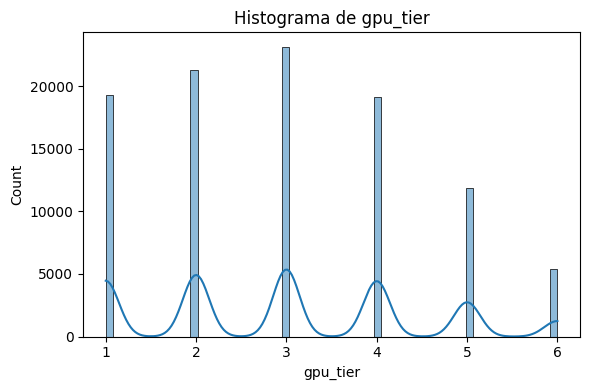

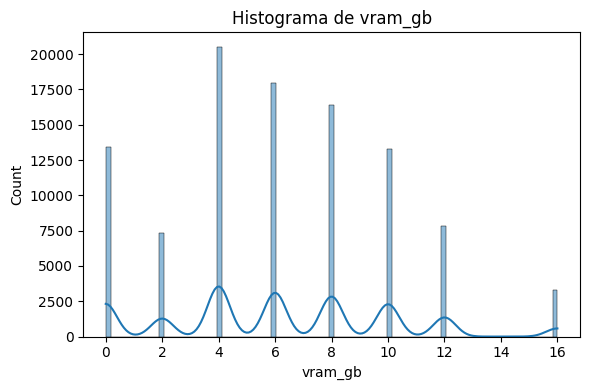

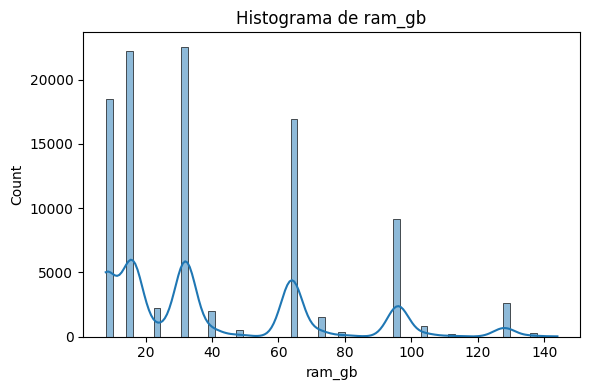

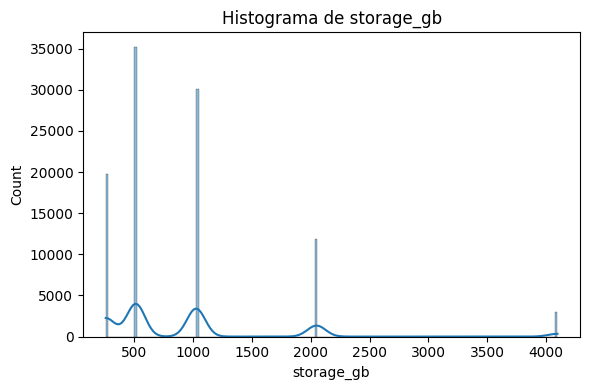

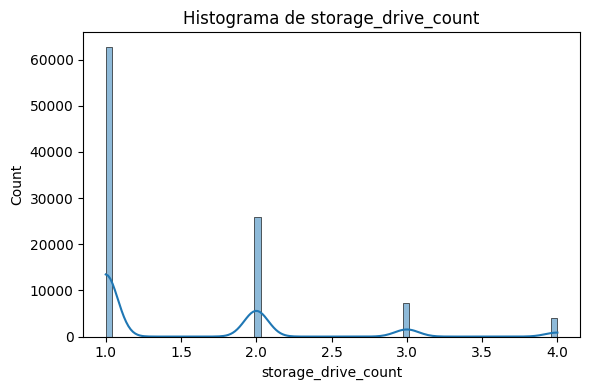

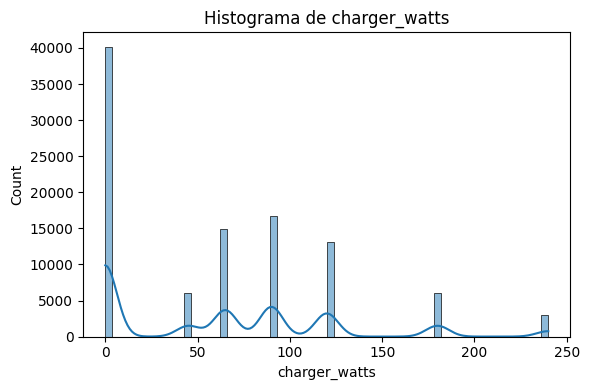

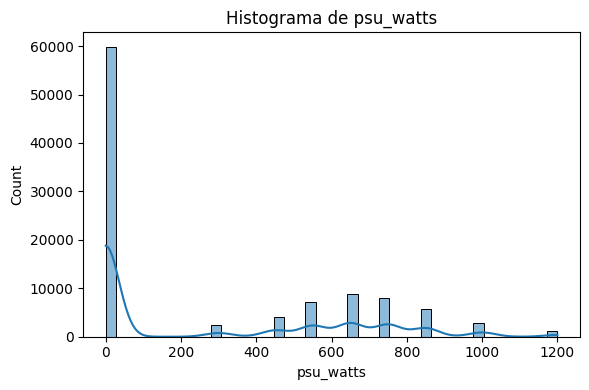

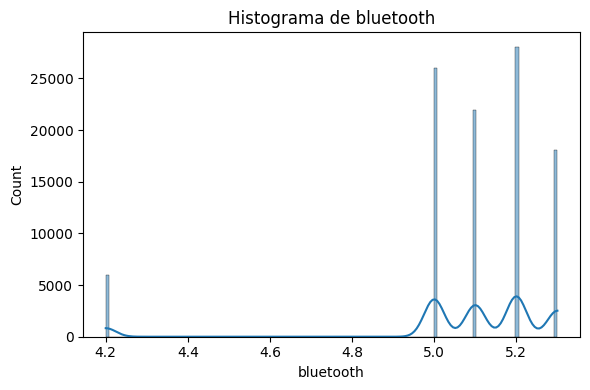

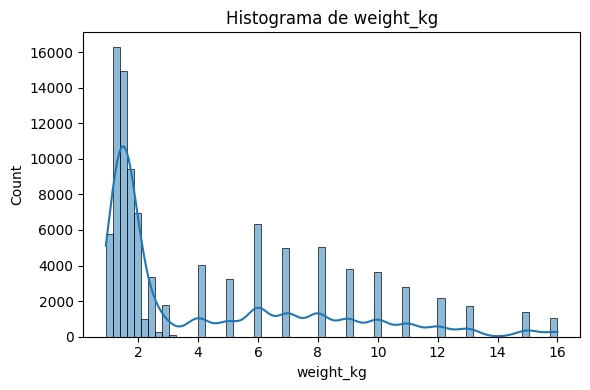

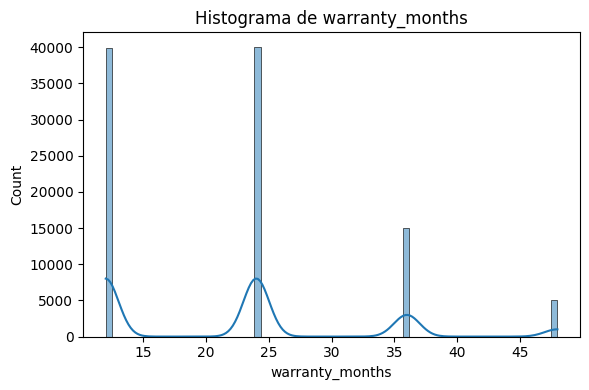

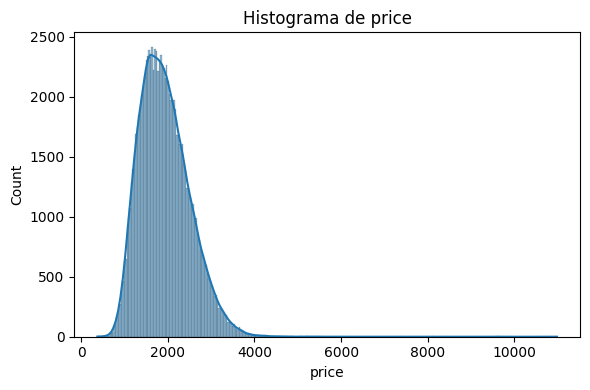

In [64]:
# Histogramas para variables numéricas

for col in num_df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(compu_df[col], kde=True)
    plt.title(f"Histograma de {col}")
    plt.tight_layout()
    plt.show()

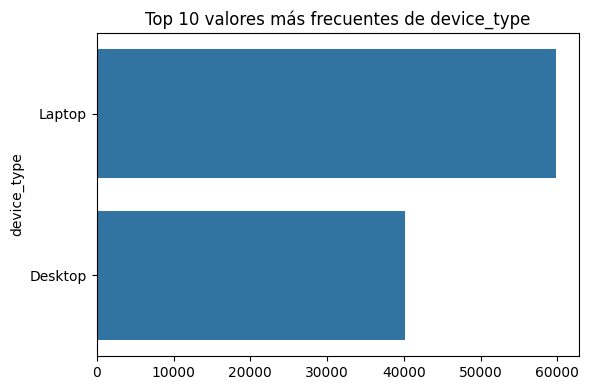

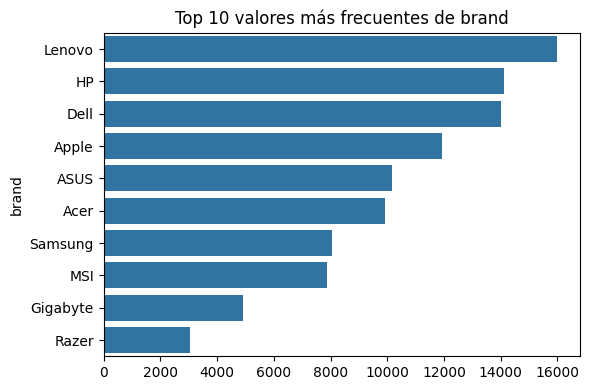

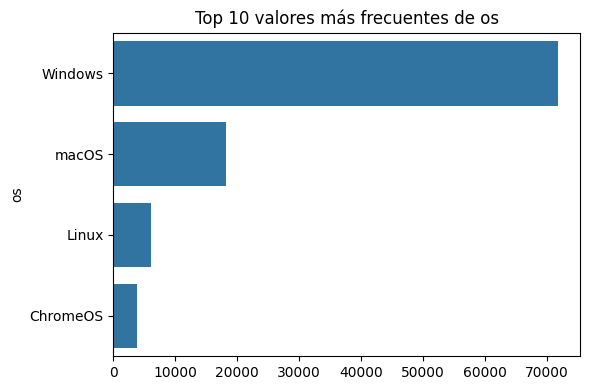

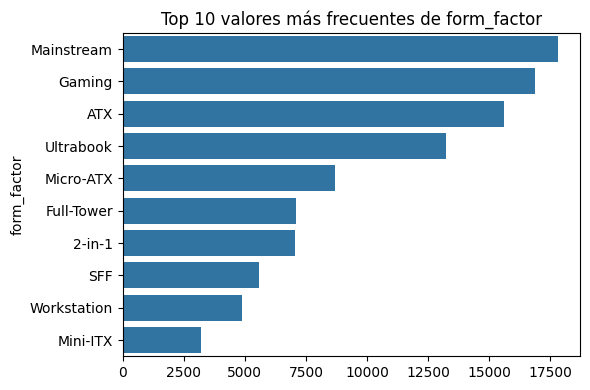

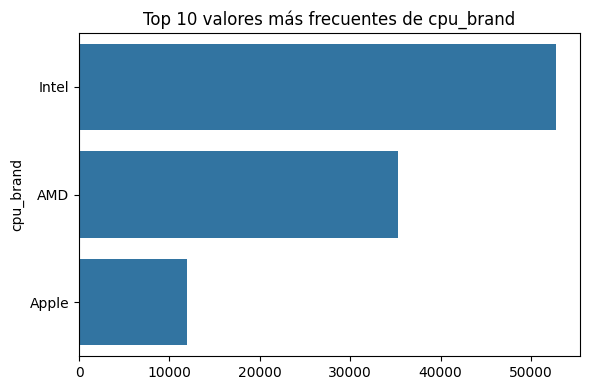

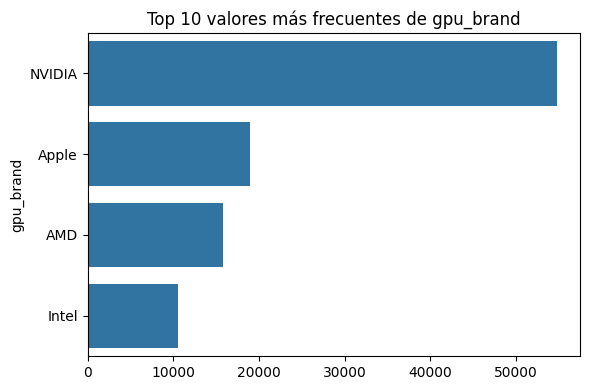

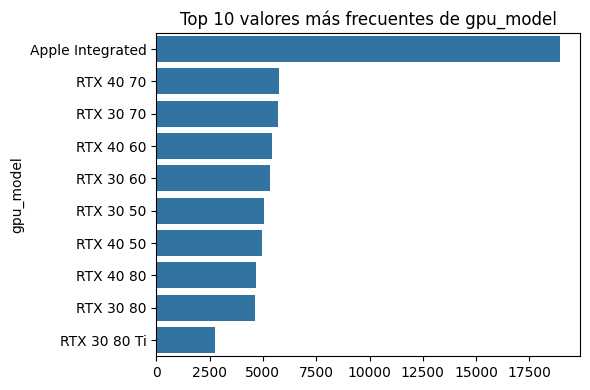

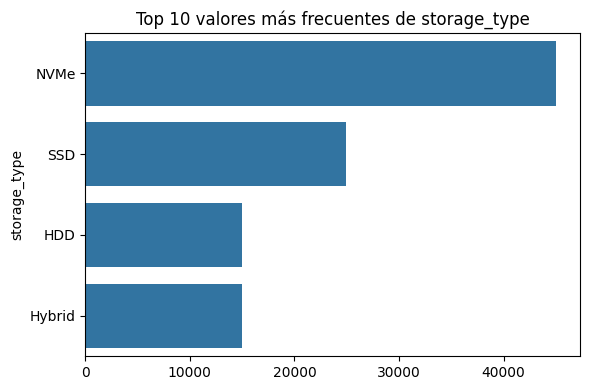

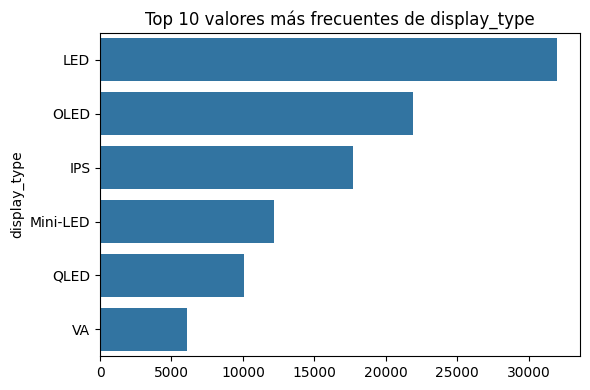

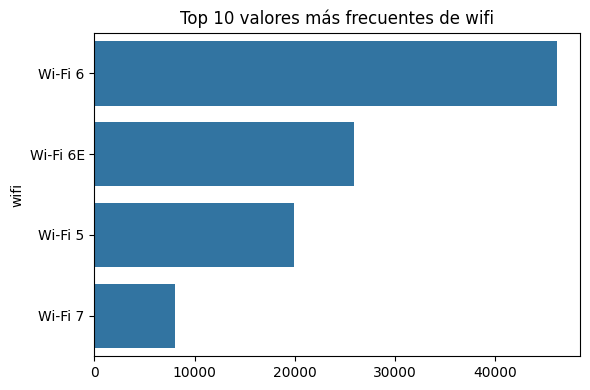

In [65]:
# Diagramas de barras para categóricas
for col in cat_df.columns:
    plt.figure(figsize=(6,4))
    
    top_values = compu_df[col].value_counts().nlargest(10)
    
    sns.barplot(x=top_values.values, y=top_values.index)
    plt.title(f"Top 10 valores más frecuentes de {col}")
    plt.tight_layout()
    plt.show()

3. Dibuja un mapa de calor con la matriz de correlación para las variables numéricas del conjunto de datos.
* Identifica los pares de variables cuya correlación sea superior a 0.9 e imprímelos.
* Reflexiona sobre cuáles variables representan de manera general la capacidad del hardware y mantenlas; elimina las demás por aportar información redundante.
* Incluye una breve justificación de tus decisiones.

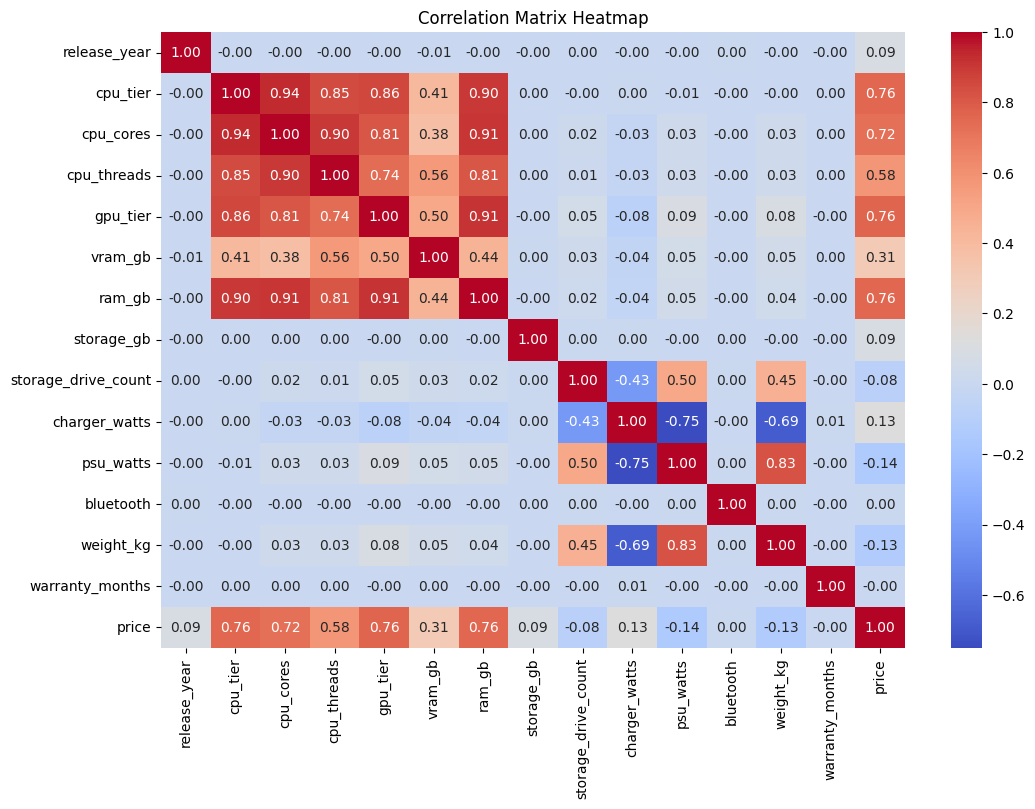

In [66]:
# Seleccionar variables numéricas
num_df = compu_df.select_dtypes(include=['int64', 'float64'])

# Matriz de correlación
corr_matrix = num_df.corr()

# Dibujar mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [67]:
# Seleccionar variables numéricas
num_df = compu_df.select_dtypes(include=['int64', 'float64'])

# Calcular matriz de correlación
corr_matrix = num_df.corr()

#Obtener matriz triangular superior (para evitar duplicados)
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Encontrar pares con correlación mayor a 0.9
high_corr_pairs = []

for col in upper_triangle.columns:
    for row in upper_triangle.index:
        corr_value = upper_triangle.loc[row, col]
        if pd.notnull(corr_value) and abs(corr_value) > 0.9:
            high_corr_pairs.append((row, col, corr_value))

# Imprimir resultados
print("Pares con correlación mayor a 0.9:\n")
for var1, var2, corr_value in high_corr_pairs:
    print(f"{var1} - {var2}: {corr_value:.3f}")

Pares con correlación mayor a 0.9:

cpu_tier - cpu_cores: 0.937
cpu_cores - ram_gb: 0.907
gpu_tier - ram_gb: 0.913


In [68]:
# Variables redundantes detectadas
columns_to_drop = ['cpu_cores', 'cpu_threads']

compu_df = compu_df.drop(columns=columns_to_drop)

In [69]:
print("Columnas actuales del dataframe:")
compu_df.info()

Columnas actuales del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   device_type          100000 non-null  object 
 1   brand                100000 non-null  object 
 2   release_year         100000 non-null  int64  
 3   os                   100000 non-null  object 
 4   form_factor          100000 non-null  object 
 5   cpu_brand            100000 non-null  object 
 6   cpu_tier             100000 non-null  int64  
 7   gpu_brand            100000 non-null  object 
 8   gpu_model            100000 non-null  object 
 9   gpu_tier             100000 non-null  int64  
 10  vram_gb              100000 non-null  int64  
 11  ram_gb               100000 non-null  int64  
 12  storage_type         100000 non-null  object 
 13  storage_gb           100000 non-null  int64  
 14  storage_drive_count  100000 non-null

#### Justificación de la eliminación de variables por alta correlación

A partir del análisis de la matriz de correlación se identificaron relaciones superiores a 0.9 entre las variables `cpu_tier`, `cpu_cores` y `cpu_threads`. Esto indica una fuerte multicolinealidad, es decir, estas variables contienen información muy similar sobre el desempeño del procesador.

Dado que `cpu_tier` representa de manera general y ordinal el nivel de capacidad del CPU, se decidió conservar esta variable por su capacidad de síntesis e interpretabilidad. En cambio, `cpu_cores` y `cpu_threads` fueron eliminadas por aportar información redundante.

Mantener variables altamente correlacionadas puede afectar negativamente algunos modelos predictivos, especialmente aquellos sensibles a la multicolinealidad como la regresión lineal, además de incrementar innecesariamente la dimensionalidad del conjunto de datos.

Con esta decisión se mejora la estabilidad del modelo, se reduce la complejidad del dataset y se preserva la información esencial relacionada con la capacidad del hardware.

---

4. Para comenzar con la ingeniería de características, crea una copia del dataframe y asígnala a un nuevo objeto llamado `compu_trans`.
* Calcula cuántos años han pasado desde el lanzamiento de cada computadora y almacénalo en una nueva columna llamada `years_since_release`; luego, elimina la columna original.
* Utiliza `KBinsDiscretizer` para reemplazar la columna `vram_gb` en 4 bins ordinales basados en cuantiles.
* Imprime los valores que delimitan cada bin y haz un histograma para ver la cantidad de observaciones en cada uno, con el fin de entender cómo se agruparon los datos.

In [70]:
# Crear copia del dataframe 
compu_trans = compu_df.copy()

In [71]:
from datetime import datetime

current_year = datetime.now().year

# Crear nueva variable
compu_trans['years_since_release'] = current_year - compu_trans['release_year']

# Eliminar columna original
compu_trans = compu_trans.drop(columns=['release_year'])

compu_trans[['years_since_release']].head()

,years_since_release
0,4
1,4
2,2
3,2
4,2


In [72]:
# Reemplazar vram_gb por bins ordinales en 4 cuantiles
kbins = KBinsDiscretizer(
    n_bins=4,
    encode='ordinal',
    strategy='quantile'
)

compu_trans['vram_gb'] = kbins.fit_transform(
    compu_trans[['vram_gb']]
)

In [73]:
compu_trans.vram_gb.head()

,vram_gb
0,2.0
1,3.0
2,1.0
3,2.0
4,3.0


In [74]:
# Imprimir limites de los bins generados
bin_edges = kbins.bin_edges_[0]

print("Límites de los bins:\n")
for i in range(len(bin_edges)-1):
    print(f"Bin {i}: {bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}")

Límites de los bins:

Bin 0: 0.00 - 4.00
Bin 1: 4.00 - 6.00
Bin 2: 6.00 - 8.00
Bin 3: 8.00 - 16.00


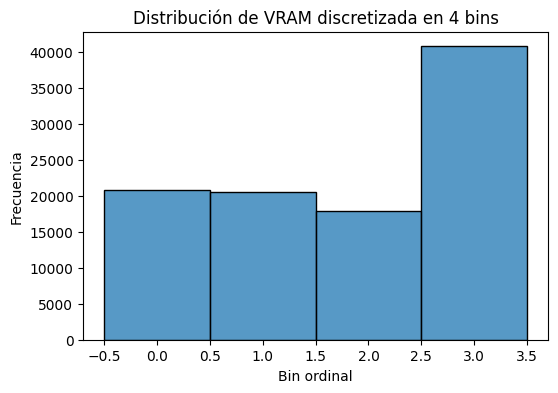

In [75]:
# Graficar histograma de vram discretizada
plt.figure(figsize=(6,4))
sns.histplot(compu_trans['vram_gb'], discrete=True)
plt.title("Distribución de VRAM discretizada en 4 bins")
plt.xlabel("Bin ordinal")
plt.ylabel("Frecuencia")
plt.show()

###$ Conclusión sobre la discretización de `vram_gb`

Se utilizó `KBinsDiscretizer` con estrategia de cuantiles para dividir la variable `vram_gb` en 4 bins ordinales. Aunque en teoría esta estrategia busca distribuir las observaciones de manera uniforme entre los grupos, en este caso los bins no quedaron perfectamente balanceados.

Esto ocurre porque `vram_gb` es una variable discreta con valores repetidos frecuentes (por ejemplo 4GB, 6GB, 8GB y 16GB). Cuando un cuantil coincide con un valor muy común, el algoritmo no puede dividir ese mismo valor entre distintos bins, lo que provoca que algunos grupos concentren más observaciones que otros.

---

5. Observa los histogramas del ejercicio 2. Notarás que en las variables `charger_watts` y `psu_watts` aparece una barra en 0. Analiza por qué ocurre esto y qué significa en relación con el tipo de dispositivo.
* Como estas variables son mutuamente excluyentes, combínalas en una nueva columna llamada `power_watts` que contenga la potencia correspondiente de cada dispositivo y, a continuación, haz un histograma para verificar que la distribución resultante es bimodal.
* Por último, borra las columnas originales `charger_watts` y `psu_watts`.

In [76]:
# Tabla cruzada entre device_type y charger_watts == 0
pd.crosstab(
    compu_trans['device_type'],
    compu_trans['charger_watts'] == 0
)

charger_watts,False,True
device_type,,
Desktop,0,40156
Laptop,59844,0


In [77]:
# Tabla cruzada entre device_type y psu_watts == 0
pd.crosstab(
    compu_trans['device_type'],
    compu_trans['psu_watts'] == 0
)

psu_watts,False,True
device_type,,
Desktop,40156,0
Laptop,0,59844


#### Esto ocurre porque:

**Laptops** usan `charger_watts` (y tienen `psu_watts = 0`)

**Desktops** usan `psu_watts` (y tienen `charger_watts = 0`)

---

In [78]:
# Crear nueva columna power_watts combinando charger y psu
compu_trans['power_watts'] = (
    compu_trans['charger_watts'] + compu_trans['psu_watts']
)

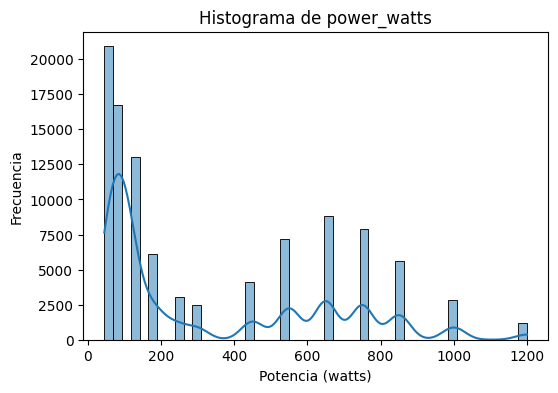

In [79]:
# Graficar histograma de power_watts
plt.figure(figsize=(6,4))
sns.histplot(compu_trans['power_watts'], kde=True)
plt.title("Histograma de power_watts")
plt.xlabel("Potencia (watts)")
plt.ylabel("Frecuencia")
plt.show()

In [80]:
# Eliminar columnas originales de potencia
compu_trans = compu_trans.drop(columns=['charger_watts', 'psu_watts'])

6. Para disminuir el sesgo de la variable `price`, crea tres transformadores: logaritmo, raíz cuadrada y Box - Cox.
* Aplica cada transformador a la variable price, dejando el resultado en variables temporales. El objetivo es comparar los efectos de cada transformación antes de decidir cuál aplicar de manera definitiva sobre las variables continuas del dataframe.
* De la variable original y de cada una de las tres transformaciones se debe mostrar:
  * Histograma: para observar la distribución de los datos.
  * Boxplot: para identificar posibles valores atípicos.
  * Q-Q plot: para evaluar la normalidad de la variable.
  * Skew (sesgo): para cuantificar la asimetría de la distribución.
  * Cantidad de outliers: para conocer cuántos valores extremos existen.
* En función de los resultados obtenidos al comparar las transformaciones, decide cuál logró el mejor efecto sobre la distribución de la variable y aplícala directamente en el dataframe, reemplazando las variables continuas: `weight_kg`, `power_watts` y `price`.

In [81]:


price_original = compu_trans['price']

price_log = np.log1p(price_original)
price_sqrt = np.sqrt(price_original)

# Box-Cox requiere valores positivos
pt = PowerTransformer(method='box-cox')
price_boxcox = pt.fit_transform(price_original.values.reshape(-1,1)).flatten()

In [82]:
from scipy import stats

In [83]:
# Función para evaluar distribución

def analyze_distribution(data, title):
    
    fig, axes = plt.subplots(1, 3, figsize=(18,4))
    
    # Histograma
    sns.histplot(data, kde=True, ax=axes[0])
    axes[0].set_title(f'Histograma - {title}')
    
    # Boxplot
    sns.boxplot(x=data, ax=axes[1])
    axes[1].set_title(f'Boxplot - {title}')
    
    # Q-Q plot
    stats.probplot(data, dist="norm", plot=axes[2])
    axes[2].set_title(f'Q-Q Plot - {title}')
    
    plt.tight_layout()
    plt.show()
    
    # Skew
    skew_value = stats.skew(data)
    print(f"Skew ({title}): {skew_value:.4f}")
    
    # Outliers (IQR)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = np.sum((data < lower) | (data > upper))
    print(f"Outliers ({title}): {outliers}\n")

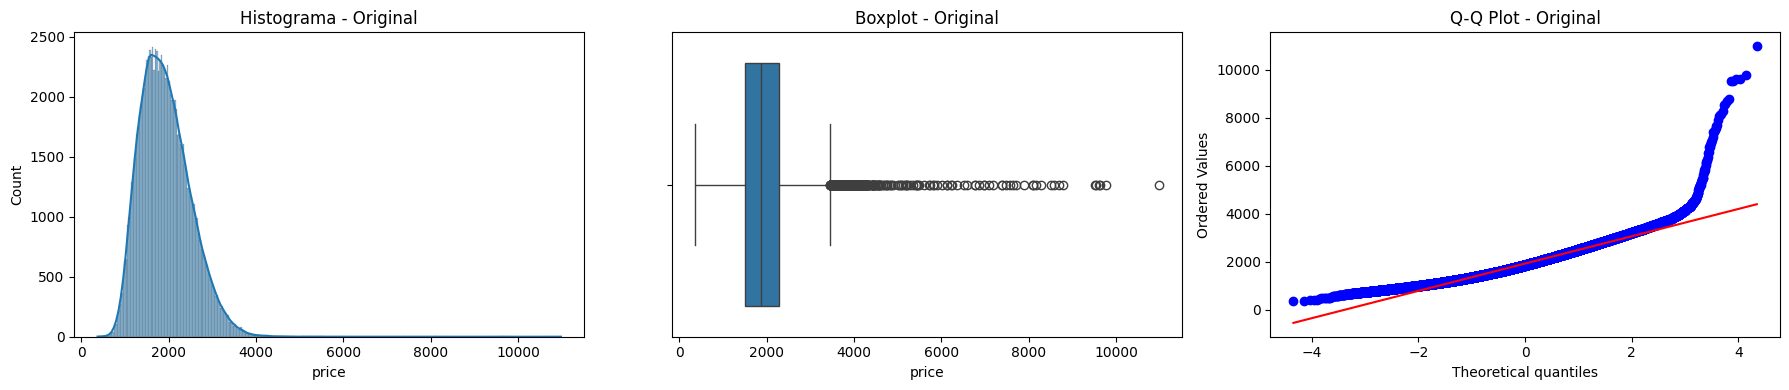

Skew (Original): 0.9866
Outliers (Original): 976



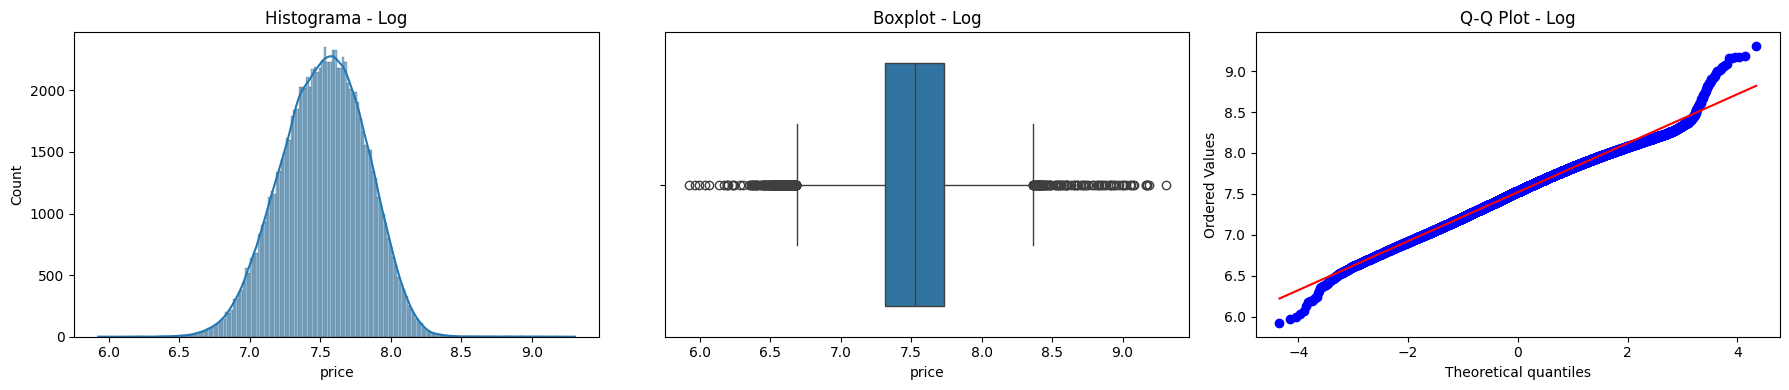

Skew (Log): -0.1326
Outliers (Log): 387



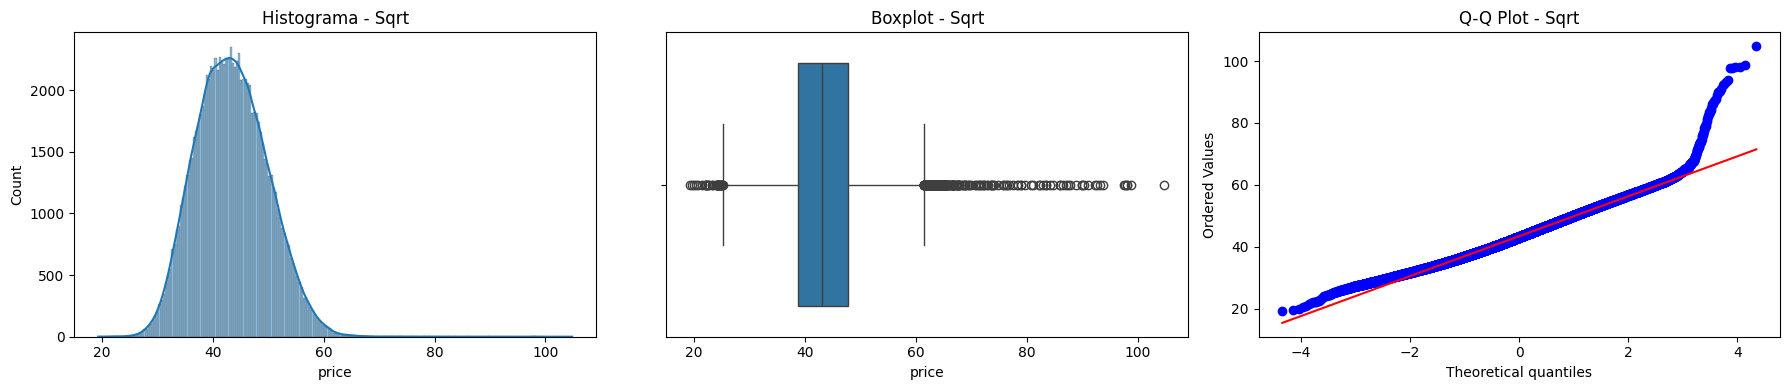

Skew (Sqrt): 0.3322
Outliers (Sqrt): 364



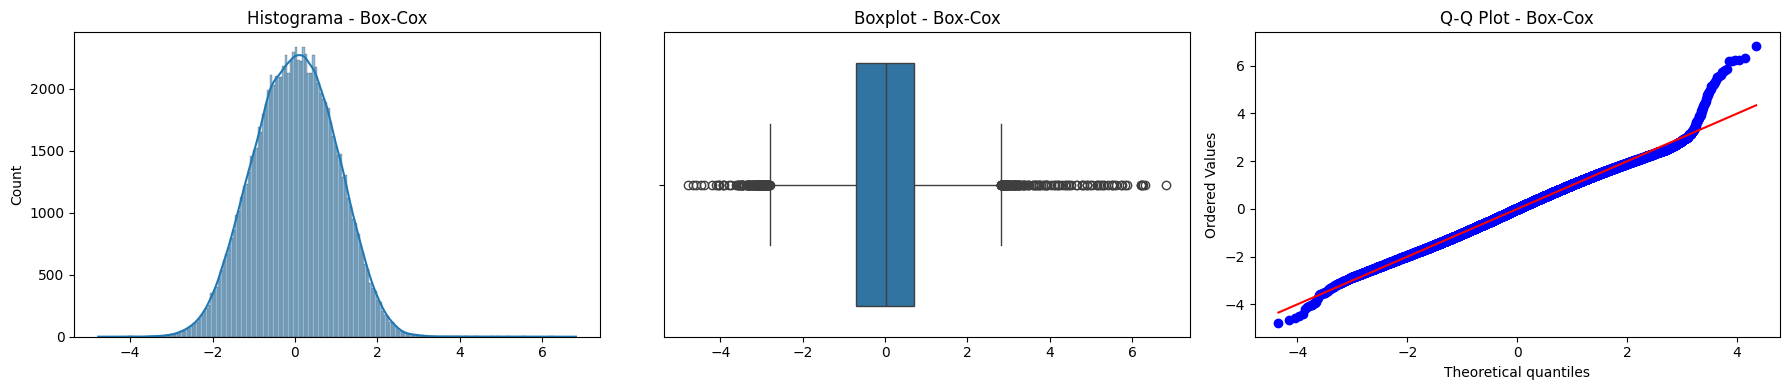

Skew (Box-Cox): -0.0002
Outliers (Box-Cox): 317



In [84]:
# Analizar variable original
analyze_distribution(price_original, "Original")

# Analizar log
analyze_distribution(price_log, "Log")

# Analizar sqrt
analyze_distribution(price_sqrt, "Sqrt")

# Analizar Box-Cox
analyze_distribution(price_boxcox, "Box-Cox")

#### Selección de la mejor transformación para `price`

Tras comparar las transformaciones logarítmica, raíz cuadrada y Box-Cox, se observó que:

- La variable original presentaba asimetría positiva significativa.
- La transformación log redujo considerablemente el sesgo.
- La transformación raíz cuadrada mejoró parcialmente la simetría.
- La transformación Box-Cox logró un sesgo prácticamente nulo (skew ≈ 0), la menor cantidad de outliers y la mejor alineación en el Q-Q plot.

Por lo tanto, se seleccionó la transformación Box-Cox como la más adecuada para normalizar la distribución de `price`.

---

In [85]:
# Aplicar Box-Cox a variables continuas
pt_final = PowerTransformer(method='box-cox')

compu_trans[['price']] = pt_final.fit_transform(compu_trans[['price']])
compu_trans[['weight_kg']] = pt_final.fit_transform(compu_trans[['weight_kg']])
compu_trans[['power_watts']] = pt_final.fit_transform(compu_trans[['power_watts']])

7. Para que todas las variables numéricas estén en la misma escala, aplica `MinMaxScaler` de sklearn a todas las columnas numéricas del dataframe, reemplazando las columnas originales.

In [86]:
# Escalar todas las variables numéricas con MinMaxScaler

# Seleccionar columnas numéricas
num_cols = compu_trans.select_dtypes(include=['int64', 'float64']).columns

# Inicializar scaler
scaler = MinMaxScaler()

# Ajustar y transformar
compu_trans[num_cols] = scaler.fit_transform(compu_trans[num_cols])

# Verificar
compu_trans[num_cols].describe()

,cpu_tier,gpu_tier,vram_gb,ram_gb,storage_gb,storage_drive_count,bluetooth,weight_kg,warranty_months,price,years_since_release,power_watts
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.430698,0.398270,0.595883,0.233135,0.168733,0.174993,0.804331,0.517032,0.283343,0.411800,0.382736,0.499405
std,0.274635,0.291929,0.394170,0.234579,0.201626,0.265761,0.223616,0.293982,0.284219,0.086261,0.289394,0.313894
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.333333,0.058824,0.066667,0.000000,0.727273,0.280423,0.000000,0.351779,0.142857,0.258382
50%,0.400000,0.400000,0.666667,0.176471,0.066667,0.000000,0.818182,0.417162,0.333333,0.412776,0.285714,0.357238
75%,0.600000,0.600000,1.000000,0.411765,0.200000,0.333333,0.909091,0.834353,0.333333,0.472899,0.571429,0.851953
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


8. Aunque `wifi` es una variable categórica, sus categorías tienen un orden natural (Wi-Fi 5 < Wi-Fi 6 < Wi-Fi 6E < Wi-Fi 7). Codifícala usando `OrdinalEncoder`.
* Luego, escala la variable codificada entre 0 y 1 con `MinMaxScaler`, para que quede en la misma escala que las variables numéricas del dataframe.

Nota: Ambos cambios deben efectuarse sobre la columna original, de manera que quede una única columna `wifi` con toda la información transformada.

In [87]:
# Ver valores únicos de wifi
compu_trans['wifi'].unique()

array(['Wi-Fi 6', 'Wi-Fi 5', 'Wi-Fi 6E', 'Wi-Fi 7'], dtype=object)

In [88]:
# Codificar wifi con orden natural

wifi_order = [['Wi-Fi 5', 'Wi-Fi 6', 'Wi-Fi 6E', 'Wi-Fi 7']]

ordinal_encoder = OrdinalEncoder(categories=wifi_order)

compu_trans[['wifi']] = ordinal_encoder.fit_transform(compu_trans[['wifi']])

In [89]:
# Escalar wifi codificado entre 0 y 1
scaler_wifi = MinMaxScaler()

compu_trans[['wifi']] = scaler_wifi.fit_transform(compu_trans[['wifi']])

In [90]:
# Verificar
compu_trans['wifi'].describe()

,wifi
count,100000.000000
mean,0.406670
std,0.284834
min,0.000000
25%,0.333333
50%,0.333333
75%,0.666667
max,1.000000


9. La variable `gpu_model` tiene muchas categorías. Usar *One-Hot Encoding* aumentaría significativamente la dimensionalidad del dataframe. Por ello, utiliza `BinaryEncoder` para codificarla.
* Guarda el resultado en un dataframe llamado `bin_df`. Más adelante, lo combinarás con `compu_transf` para integrar las variables codificadas.

In [91]:
# Codificar gpu_model usando BinaryEncoder
binary_encoder = BinaryEncoder(cols=['gpu_model'])

bin_df = binary_encoder.fit_transform(compu_trans[['gpu_model']])

# Ver resultado
bin_df.head()

,gpu_model_0,gpu_model_1,gpu_model_2,gpu_model_3,gpu_model_4,gpu_model_5
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,1
3,0,0,0,1,0,0
4,0,0,0,1,0,1


In [92]:
bin_df.shape

(100000, 6)

10. Usa `OneHotEncoder` para codificar las variables categóricas restantes. Asegúrate de usar `drop='first'` para evitar la multicolinealidad y guarda el resultado en un dataframe llamado `ohe_df`
* Combina el dataframe `compu_transf` con las variables categóricas que fueron codificadas en `bin_df` y `ohe_df`. No olvides eliminar las variables originales.
* Usa `describe()` sobre el dataframe resultante para corroborar que todas las columnas estén escaladas entre 0 y 1 y que no queden variables categóricas sin codificar.

In [93]:
# Preparar compu_transf como copia de compu_trans
compu_transf = compu_trans.copy()

In [94]:
# Identificar categóricas restantes para OneHot (excluye gpu_model)
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

cat_cols = compu_transf.select_dtypes(include=['object']).columns.tolist()
cat_cols = [c for c in cat_cols if c != 'gpu_model']

cat_cols

['device_type',
 'brand',
 'os',
 'form_factor',
 'cpu_brand',
 'gpu_brand',
 'storage_type',
 'display_type']

In [95]:
# Aplicar OneHotEncoder con drop first y crear ohe_df
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

ohe_arr = ohe.fit_transform(compu_transf[cat_cols])
ohe_cols = ohe.get_feature_names_out(cat_cols)

ohe_df = pd.DataFrame(ohe_arr, columns=ohe_cols, index=compu_transf.index)

ohe_df.head()

,device_type_Laptop,brand_Acer,brand_Apple,brand_Dell,brand_Gigabyte,brand_HP,brand_Lenovo,brand_MSI,brand_Razer,brand_Samsung,...,gpu_brand_Intel,gpu_brand_NVIDIA,storage_type_Hybrid,storage_type_NVMe,storage_type_SSD,display_type_LED,display_type_Mini-LED,display_type_OLED,display_type_QLED,display_type_VA
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [96]:
# Combinar compu_transf con bin_df y ohe_df, eliminando originales
cols_to_drop = cat_cols + ['gpu_model']

compu_transf = compu_transf.drop(columns=cols_to_drop)
compu_transf = pd.concat([compu_transf, bin_df, ohe_df], axis=1)

compu_transf.head()

,cpu_tier,gpu_tier,vram_gb,ram_gb,storage_gb,storage_drive_count,wifi,bluetooth,weight_kg,warranty_months,...,gpu_brand_Intel,gpu_brand_NVIDIA,storage_type_Hybrid,storage_type_NVMe,storage_type_SSD,display_type_LED,display_type_Mini-LED,display_type_OLED,display_type_QLED,display_type_VA
0,0.4,0.2,0.666667,0.058824,0.200000,0.000000,0.333333,0.818182,0.932995,0.666667,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.6,0.6,1.000000,0.411765,0.066667,0.000000,0.333333,1.000000,0.423737,0.000000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.2,0.0,0.333333,0.000000,0.066667,0.333333,0.333333,0.727273,0.834353,0.333333,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.2,0.2,0.666667,0.058824,0.066667,0.333333,0.333333,0.909091,0.795505,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.8,0.8,1.000000,0.647059,0.000000,0.000000,0.333333,0.909091,0.280423,0.000000,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [97]:
# Corroborar que no queden categóricas y que todo esté en 0 a 1
compu_transf.describe()

,cpu_tier,gpu_tier,vram_gb,ram_gb,storage_gb,storage_drive_count,wifi,bluetooth,weight_kg,warranty_months,...,gpu_brand_Intel,gpu_brand_NVIDIA,storage_type_Hybrid,storage_type_NVMe,storage_type_SSD,display_type_LED,display_type_Mini-LED,display_type_OLED,display_type_QLED,display_type_VA
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.430698,0.398270,0.595883,0.233135,0.168733,0.174993,0.406670,0.804331,0.517032,0.283343,...,0.105990,0.547120,0.149810,0.450590,0.249370,0.320000,0.121880,0.219100,0.100690,0.060910
std,0.274635,0.291929,0.394170,0.234579,0.201626,0.265761,0.284834,0.223616,0.293982,0.284219,...,0.307826,0.497777,0.356887,0.497555,0.432651,0.466478,0.327149,0.413639,0.300919,0.239166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.333333,0.058824,0.066667,0.000000,0.333333,0.727273,0.280423,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.400000,0.400000,0.666667,0.176471,0.066667,0.000000,0.333333,0.818182,0.417162,0.333333,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,0.600000,1.000000,0.411765,0.200000,0.333333,0.666667,0.909091,0.834353,0.333333,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
# Validar rangos globales y ausencia de object
print("Columnas object restantes:", compu_transf.select_dtypes(include=['object']).columns.tolist())

compu_transf = compu_transf.round(10)
mins = compu_transf.min(numeric_only=True).min()
maxs = compu_transf.max(numeric_only=True).max()


print("Mínimo global numérico:", mins)
print("Máximo global numérico:", maxs)

Columnas object restantes: []
Mínimo global numérico: 0.0
Máximo global numérico: 1.0
